<a href="https://colab.research.google.com/github/g238025t/PotepanRepo/blob/main/MedicalCost_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 各種ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## データのダウンロードと前処理

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/0310/insurance2.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


In [ ]:
# df=df.drop(index=116)
# df=df.drop(index=286)
# df=df.drop(index=401)
# df=df.drop(index=543)
# df=df.drop(index=847)
# df=df.drop(index=860)
# df=df.drop(index=1047)
# df=df.drop(index=1088)
# df=df.drop(index=1317)

### 特徴量の説明

Key Fields の簡単な説明

age:主たる受益者の年齢<br>	
sex:保険請負業者の性別、女性、男性<br>	
bmi:ボディマス指数、体の理解を提供し、身長に対して比較的高いまたは低い
体重、体重に対する身長の比率を使用した体重の客観的指数（kg / m ^ 2）、理想的には18.5〜24.9<br><br>
children:健康保険の対象となる子どもの数/扶養家族の数<br><br>
smoker:喫煙の有無<br><br>
region:米国の受益者の住宅地、北東、南東、南西、北西。<br><br>
charges:健康保険で請求される個人医療費 年単位

In [6]:
#ホールドアウト法

# charges列以外を X, charges列を y に入れる
col_name = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
# 説明変数(X),目的変数(y)
X,y = df[col_name],df[['charges']]
# X2, y2 = df.iloc[:, 0:-1], df.iloc[:, -1]
# X3,y3 = df[df.columns[df.columns != 'charges']] ,df['charges']


# 学習80% テスト20%で分割
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
!pip3 install sweetviz

     |████████████████████████████████| 15.1 MB 5.5 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


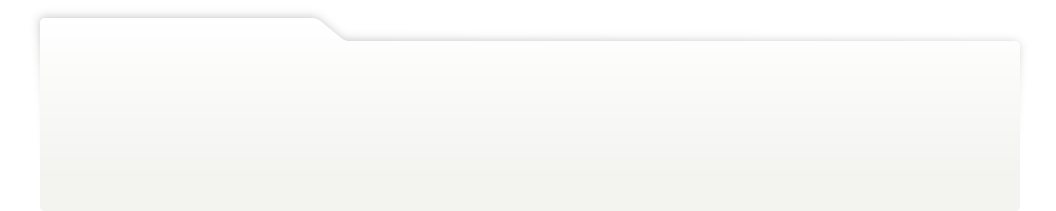
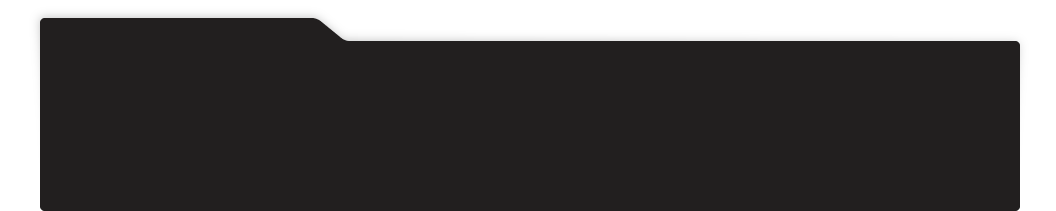
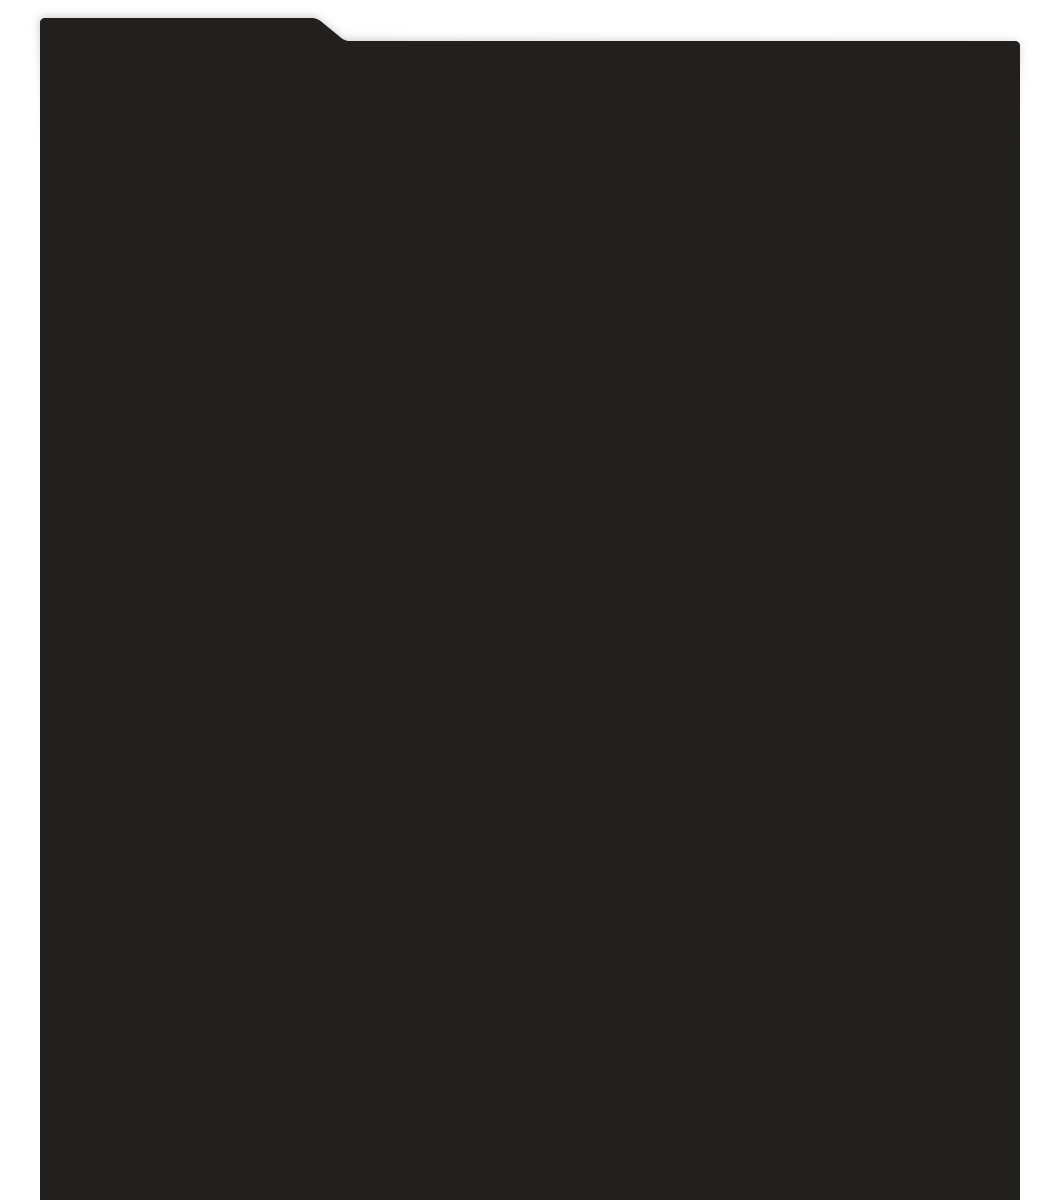
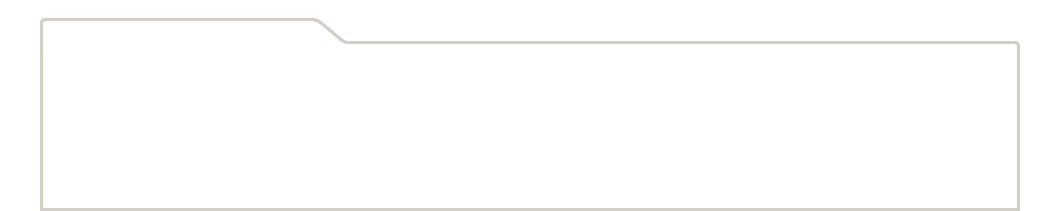
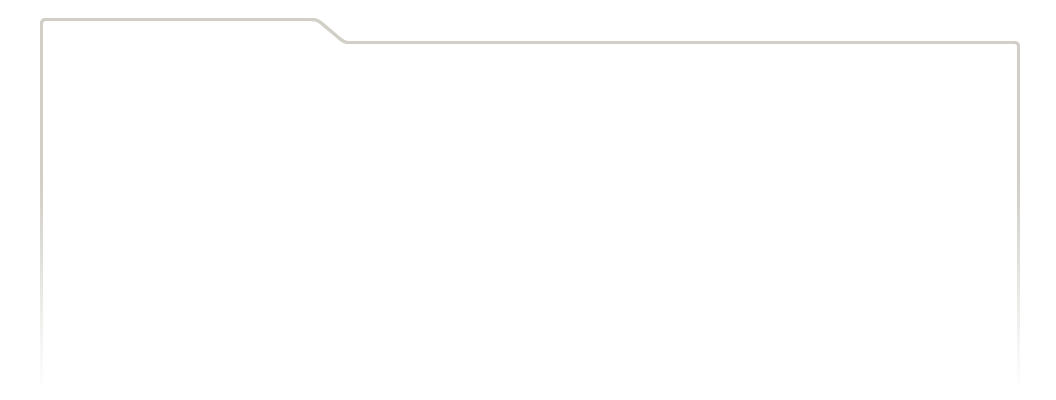
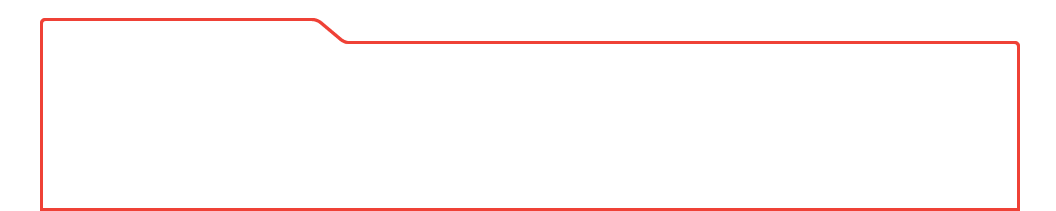
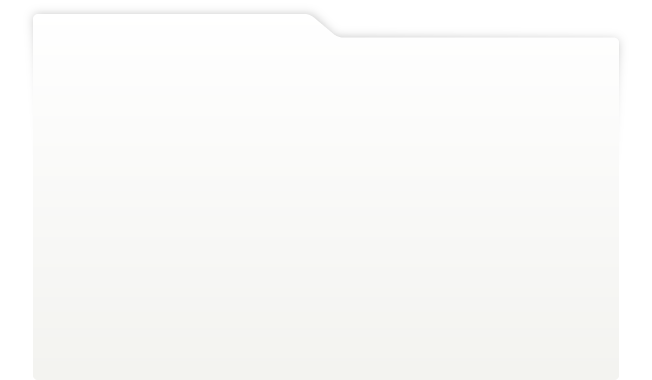
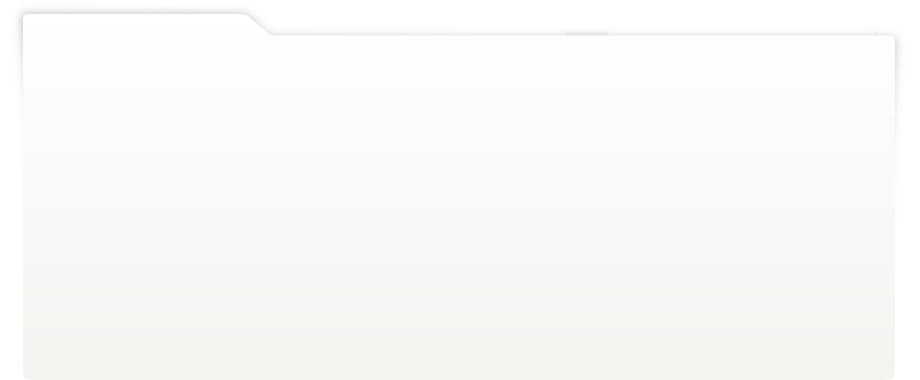
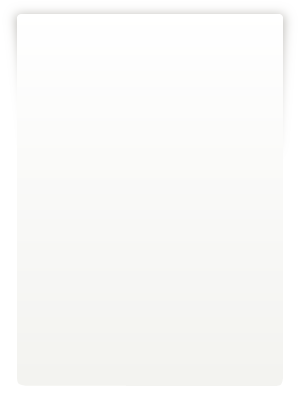
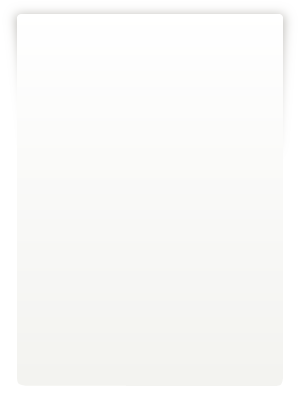
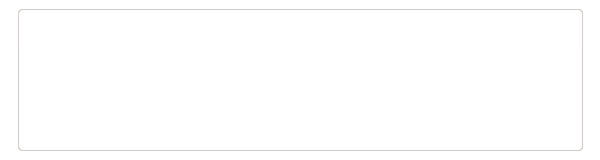
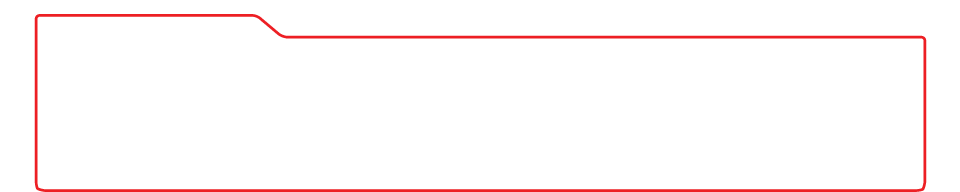
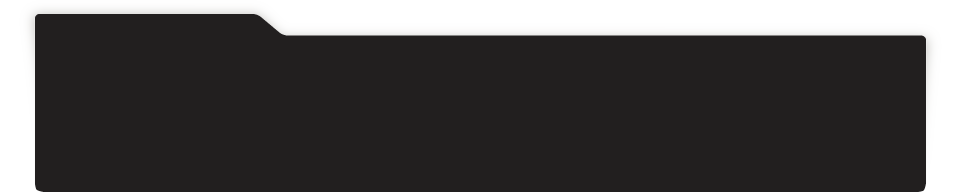
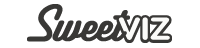
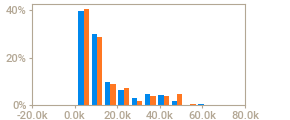
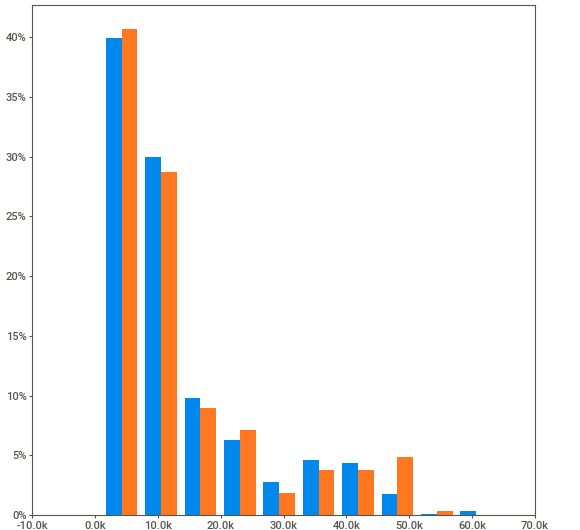
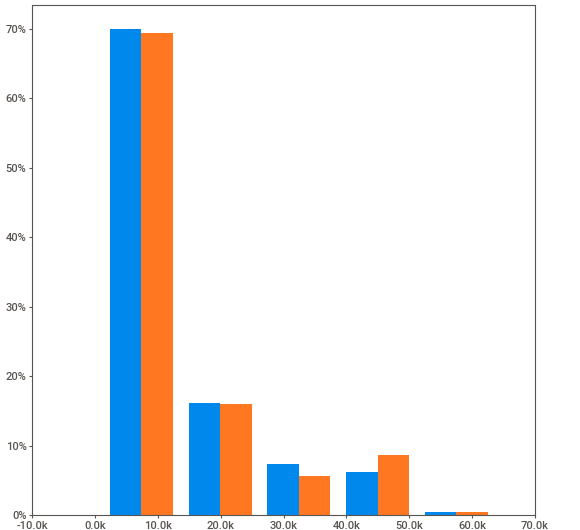
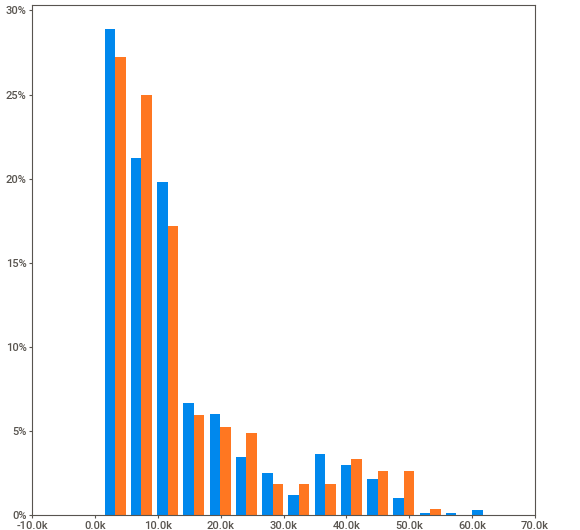
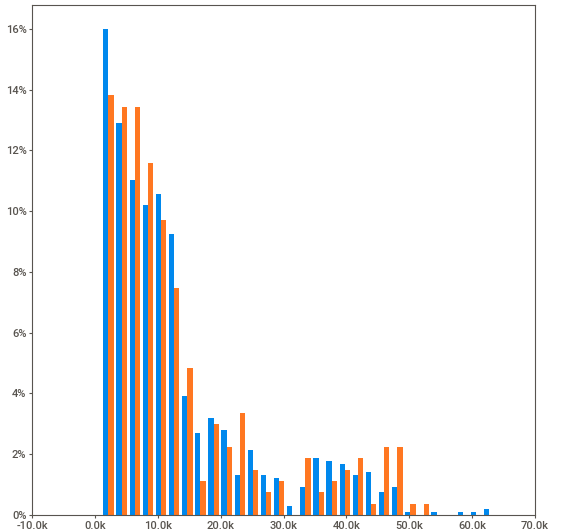
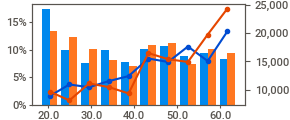
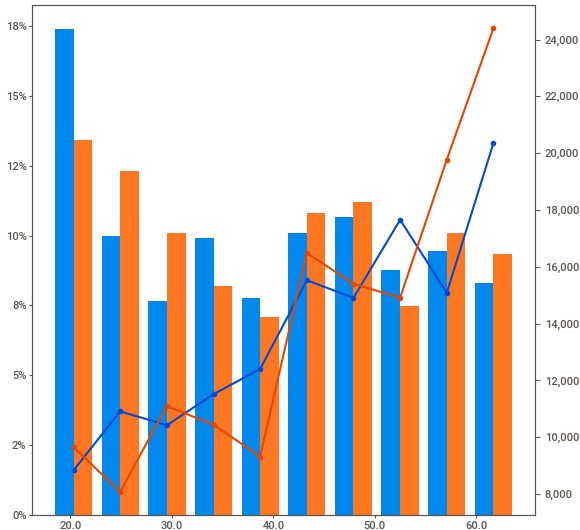
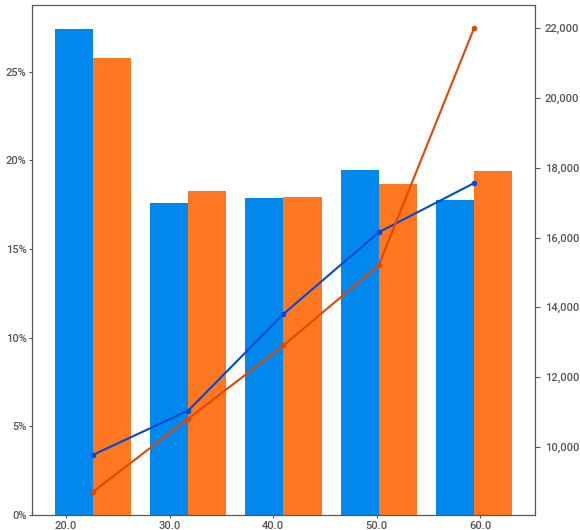
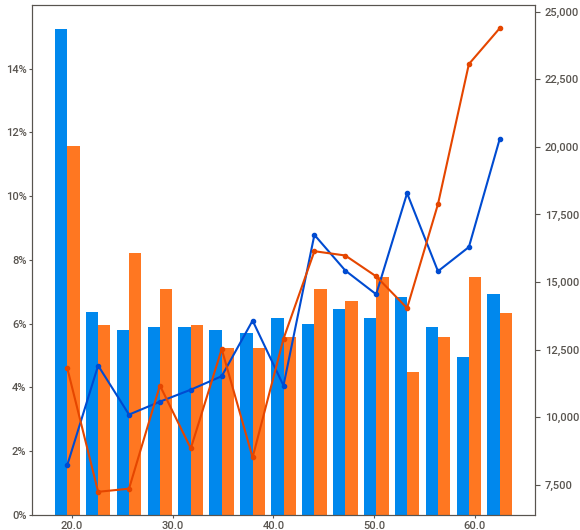
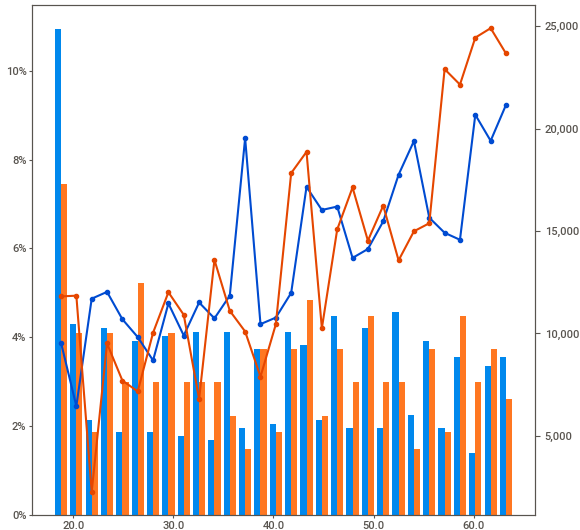
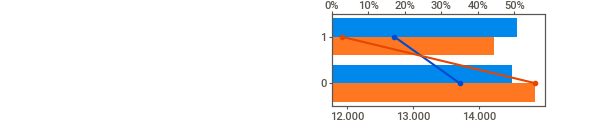
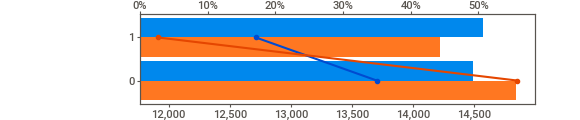
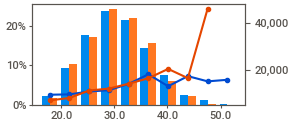
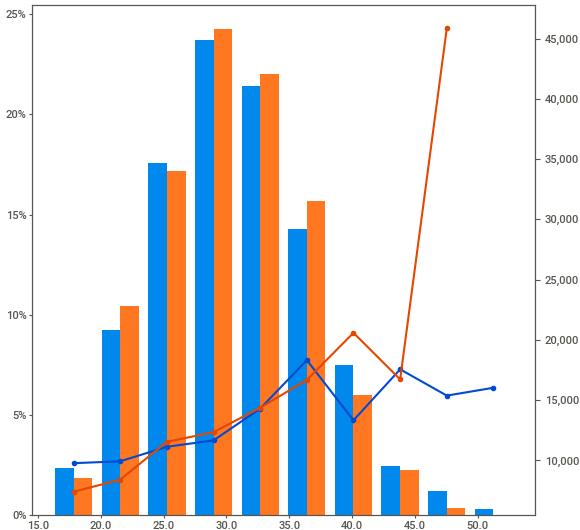
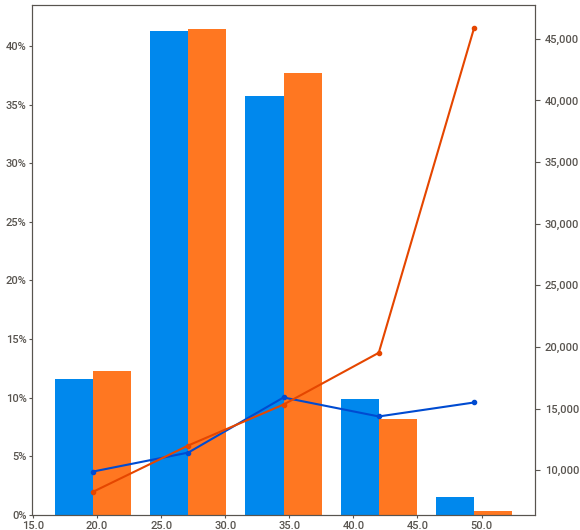
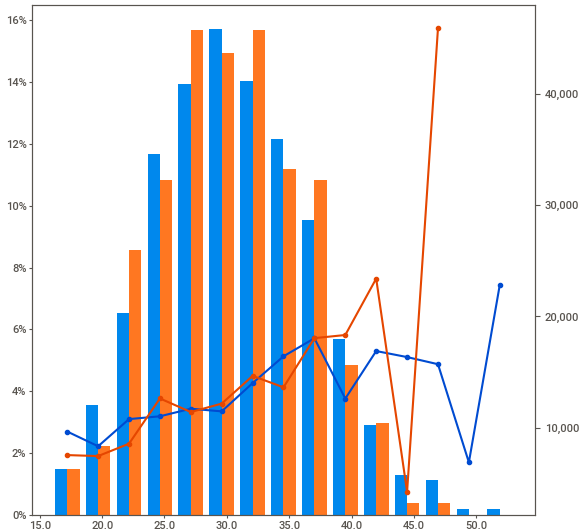
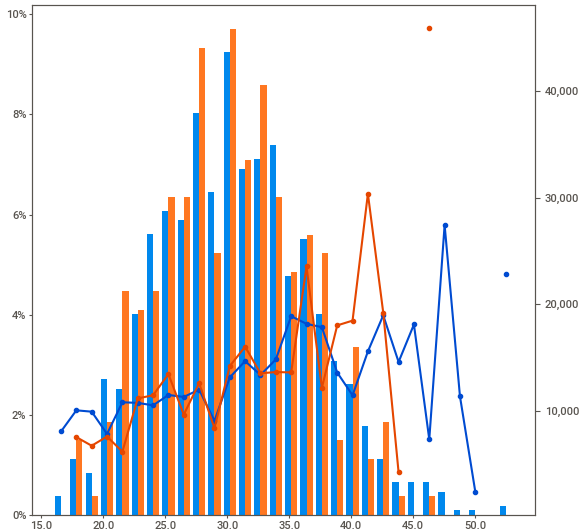
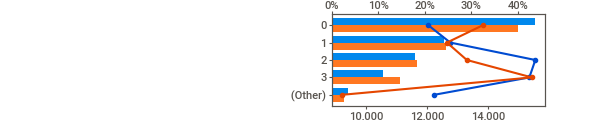
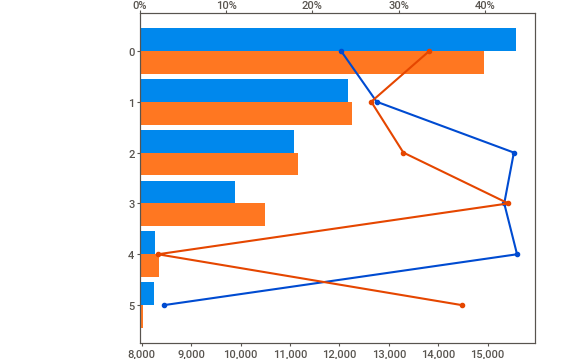
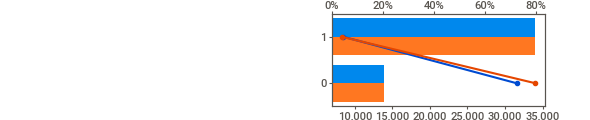
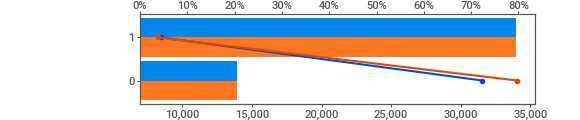
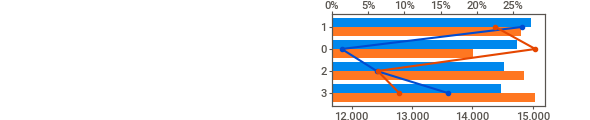
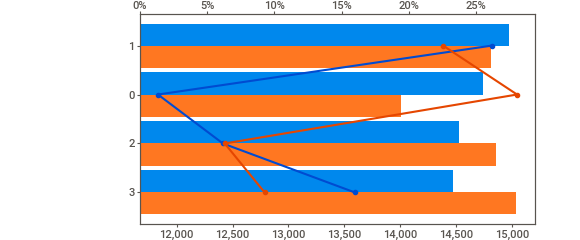
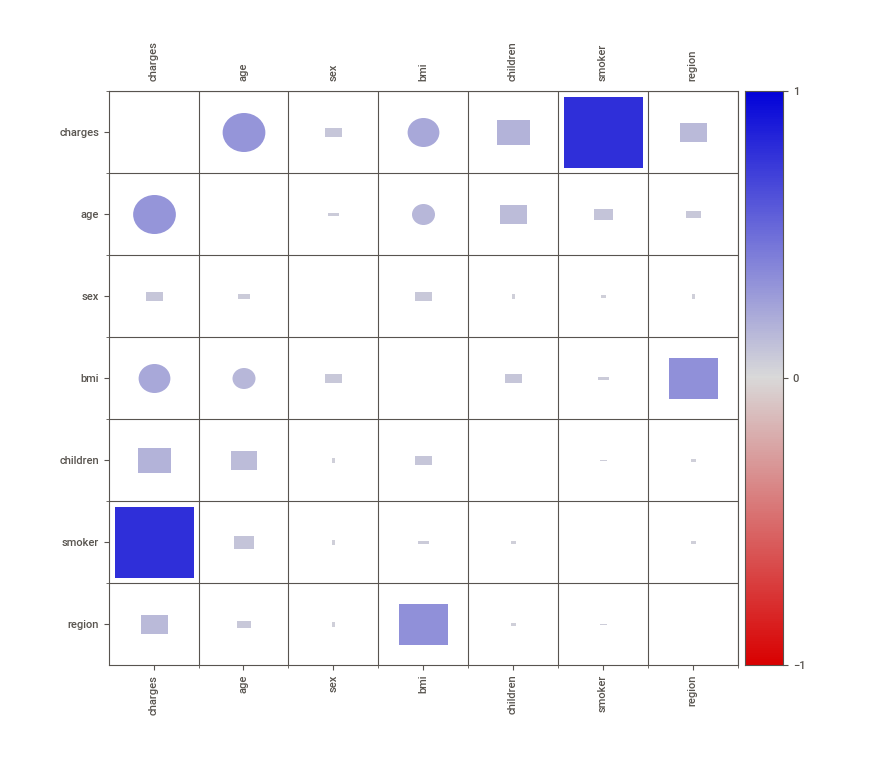
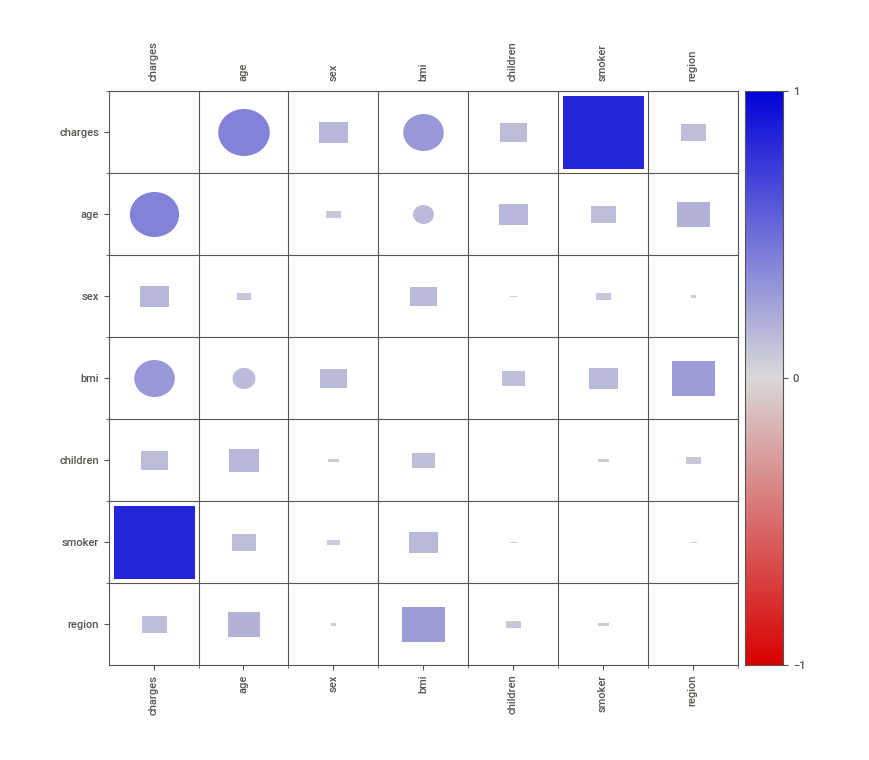

In [9]:
import sweetviz
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_val, y_val], axis=1)
# 学習用データとテスト用データの比較を行う
report_train_vs_test = sweetviz.compare([df_train, "Train"], # [学習用データのデータフレーム, 表示名]
                                        [df_test, "Test"], # [テスト用データのデータフレーム, 表示名]
                                        'charges') # 目的変数の列名
report_train_vs_test.show_notebook() # 比較結果のサマリを表示

In [10]:
#標準化

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform(X_val)

#評価指標
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
def get_eval_score(y_true,y_pred):
    mae=mean_absolute_error(y_true, y_pred)
    mse=mean_squared_error(y_true, y_pred)
    rmse=np.sqrt(mse)
    r2score=r2_score(y_true, y_pred)
    #誤差を測定する
    print(f" MAE={mae}")
    print(f" MSE={mse}")
    #RMSEが小さければ小さいほど機械学習モデルの性能がよい
    print(f" RMSE={rmse}")
    #モデルの適合度合いを測定する
    print(f" R2={r2score}")


#残差プロット
def residual_plot(y_train_pred,y_train,y_val_pred,y_val):
    plt.scatter(y_train_pred,y_train_pred - y_train,label="train")
    plt.scatter(y_val_pred,y_val_pred - y_val,label="val")
    plt.plot([0,50],[0,0],color="red")
    plt.xlabel("Pred")
    plt.ylabel("Pred-True")
    plt.title("Residual Plot")
    plt.legend()
    plt.show()


## scikit-learn

In [11]:
# scikit-learn の勾配ブースティング木は欠損値の取り扱いが含まれていない
# 今回は，特徴量がすべて 0 以上なので，欠損値を -1 に変換
X_train_nan2minus1 = X_train.replace({np.nan: -1})
X_val_nan2minus1 = X_val.replace({np.nan: -1})

scikit-learnのRidgeの訓練データスコア
 MAE=4236.36716262259
 MSE=37729676.79091497
 RMSE=6142.448761765536
 R2=0.7368299512684899
scikit-learnのRidgeの検証データスコア
 MAE=3932.164022675856
 MSE=31857319.043472182
 RMSE=5644.228826285499
 R2=0.7998031383996457
w0(age)=3573.0284750213114
w1(sex)=11.687820410252233
w2(bmi)=2028.9840373228108
w3(childre)=536.8010276253506
w4(smoker)=-9500.043774991187
w5(region)=318.81027510849503
b=13201.182056009347


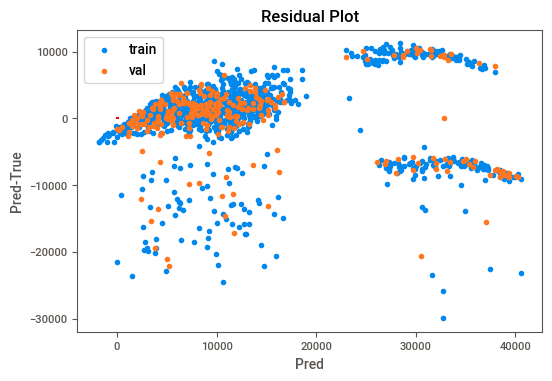

In [12]:
# use Ridge
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled,y_train)

y_train_pred=ridge.predict(X_train_scaled)
y_val_pred=ridge.predict(X_val_scaled)
    
print("scikit-learnのRidgeの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのRidgeの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),ridge.coef_[0])):
    print(f"w{i}({col})={coef}")
    
print(f"b={ridge.intercept_[0]}")

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

In [13]:
lasso_reg.intercept_

NameError: ignored

scikit-learnのLinearRegressionの訓練データスコア
 MAE=4235.383876032093
 MSE=37729580.50984919
 RMSE=6142.440924408568
 R2=0.7368306228430945
scikit-learnのLinearRegressionの検証データスコア
 MAE=3930.333273901142
 MSE=31845929.134159446
 RMSE=5643.219748880903
 R2=0.7998747145449958
w0(age)=3576.6214771474083
w1(sex)=12.160915671082648
w2(bmi)=2030.7087428811271
w3(childre)=536.8542944027187
w4(smoker)=-9509.156510566463
w5(region)=319.054719651893
b=13201.182056009347


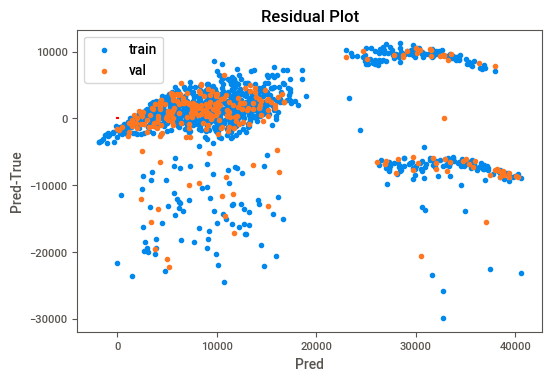

In [14]:
#use  LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

multi_reg = LinearRegression().fit(X_train_scaled,y_train)
y_train_pred=multi_reg.predict(X_train_scaled)
y_val_pred=multi_reg.predict(X_val_scaled)
    
print("scikit-learnのLinearRegressionの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのLinearRegressionの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),multi_reg.coef_[0])):
    print(f"w{i}({col})={coef}")
    
print(f"b={multi_reg.intercept_[0]}")

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

scikit-learnのLassoの訓練データスコア
 MAE=4235.275355416082
 MSE=37729586.77201999
 RMSE=6142.441434154663
 R2=0.7368305791635315
scikit-learnのLassoの検証データスコア
 MAE=4235.275355416082
 MSE=37729586.77201999
 RMSE=6142.441434154663
 R2=0.7368305791635315
w0(age)=3575.7980052704806
w1(sex)=11.059013328945893
w2(bmi)=2029.5901738188315
w3(childre)=535.8627390039067
w4(smoker)=-9508.09062618493
w5(region)=317.89266852440267
b=[13201.18205601]


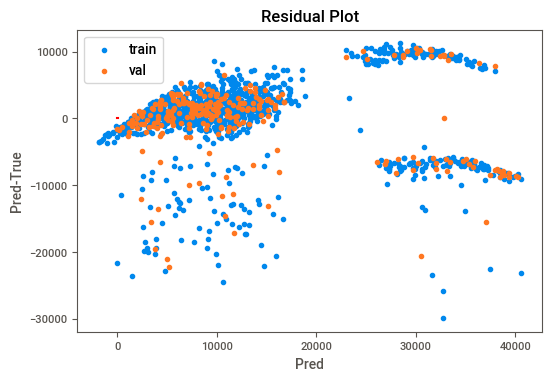

In [15]:
#use Lasso
from sklearn.linear_model import Lasso

lasso_reg  = Lasso().fit(X_train_scaled,y_train)
y_train_pred=lasso_reg.predict(X_train_scaled)
y_val_pred=lasso_reg.predict(X_val_scaled)
    
print("scikit-learnのLassoの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのLassoの検証データスコア")
get_eval_score(y_train,y_train_pred)

for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),lasso_reg.coef_)):
    print(f"w{i}({col})={coef}")
    
print(f"b={lasso_reg.intercept_}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

scikit-learnのKNeighborsRegressorの訓練データスコア
 MAE=2631.800287358878
 MSE=19311752.7447332
 RMSE=4394.513937255541
 R2=0.8652976822704698
scikit-learnのKNeighborsRegressorの検証データスコア
 MAE=3106.7512961455222
 MSE=23811302.062757954
 RMSE=4879.682578073901
 R2=0.850365690311942


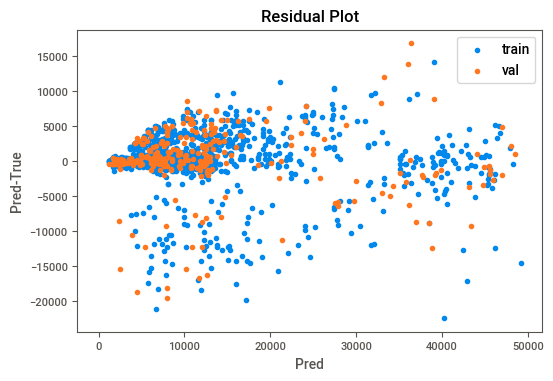

In [16]:
#use Kneighbors#クラスタリング＃重みなし#k-最近傍法
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor().fit(X_train_scaled,y_train)
y_train_pred=knn_reg.predict(X_train_scaled)
y_val_pred=knn_reg.predict(X_val_scaled)
    
print("scikit-learnのKNeighborsRegressorの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのKNeighborsRegressorの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),knn_reg.coef_)):
#     print(f"w{i}({col})={coef}")
    
# print(f"b={knn_reg.intercept_}")

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scikit-learnのSVRの訓練データスコア
 MAE=8244.834299737815
 MSE=156743619.82773688
 RMSE=12519.729223419206
 R2=-0.0933098180780485
scikit-learnのSVRの検証データスコア
 MAE=8574.67632522317
 MSE=175139895.36376122
 RMSE=13234.043046769993
 R2=-0.10060916755090288


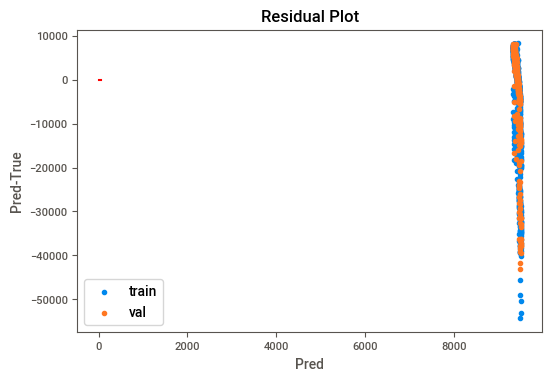

In [17]:
#use Support vector classifier (linear kernel)#分類：重みなし
from sklearn.svm import SVR

SVR_reg = SVR().fit(X_train_scaled,y_train)
y_train_pred=SVR_reg.predict(X_train_scaled)
y_val_pred=SVR_reg.predict(X_val_scaled)


print("scikit-learnのSVRの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのSVRの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),SVR_reg.coef_)):
#print(f"w{i}({col})={coef}")
    
# print(f"b={SVR_reg.intercept_}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


scikit-learnのRandomForestRegressorの訓練データスコア
 MAE=7682.385395220561
 MSE=116101046.83024143
 RMSE=10775.019574471382
 R2=0.19017811041913746
scikit-learnのRandomForestRegressorの検証データスコア
 MAE=7827.1064854179085
 MSE=121066691.8509071
 RMSE=11003.031030171054
 R2=0.23919612570615278


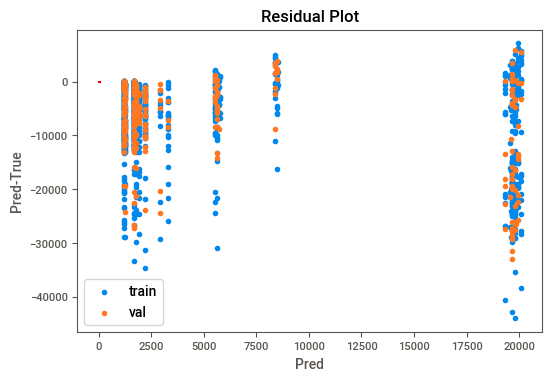

In [18]:
#use Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=10,max_depth=20,random_state=0).fit(X_train,y_train)
y_train_pred=rf_reg.predict(X_train_scaled)
y_val_pred=rf_reg.predict(X_val_scaled)
    
print("scikit-learnのRandomForestRegressorの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのRandomForestRegressorの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),rf_reg.coef_[0])):
#     print(f"w{i}({col})={coef}")
    
# print(f"b={rf_reg.intercept_[0]}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


scikit-learnのDecisionTreeRegressorの訓練データスコア
 MAE=7462.733841990655
 MSE=105011315.1730997
 RMSE=10247.502874998361
 R2=0.2675306209323499
scikit-learnのDecisionTreeRegressorの検証データスコア
 MAE=7498.902030767413
 MSE=108716233.37775806
 RMSE=10426.70769599676
 R2=0.3168085268713595


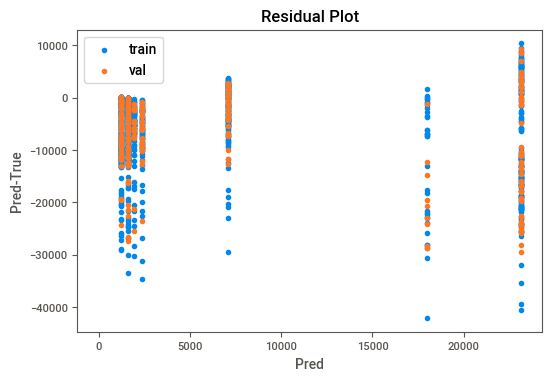

In [19]:
#use decision tree＃分類　重みなし
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=50,min_samples_leaf=2,random_state=0).fit(X_train,y_train)
y_train_pred=tree_reg.predict(X_train_scaled)
y_val_pred=tree_reg.predict(X_val_scaled)
    
print("scikit-learnのDecisionTreeRegressorの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのDecisionTreeRegressorの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),tree_reg.coef_[0])):
#     print(f"w{i}({col})={coef}")
    
# print(f"b={tree_reg.intercept_[0]}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)


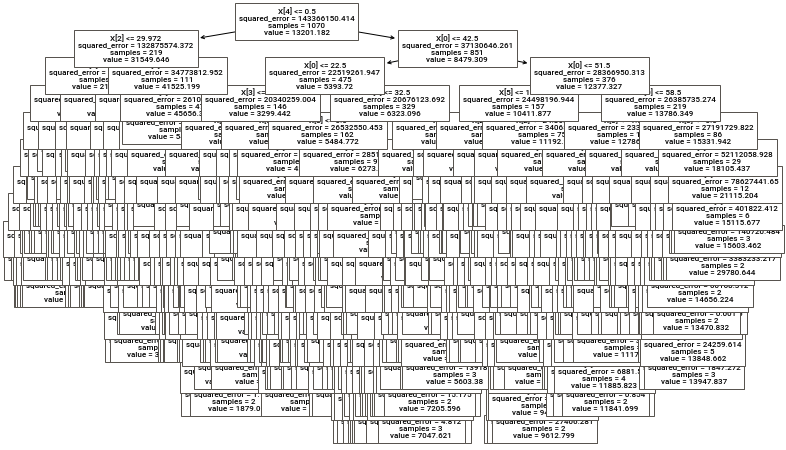

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
tree.plot_tree(tree_reg,fontsize=8)
print()

In [21]:
#予測値の算出
y_train_pred=tree_reg.predict(X_train_scaled)
y_val_pred=tree_reg.predict(X_val_scaled)

import numpy as np

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_val_pred))
print(y_val_pred[:5])


1070
[[17961.1801    ]
 [ 1242.21366667]
 [23146.5054    ]
 [ 1967.587     ]
 [ 1611.6384    ]]
268
[[ 1242.21366667]
 [ 1611.6384    ]
 [23146.5054    ]
 [ 1242.21366667]
 [ 1611.6384    ]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


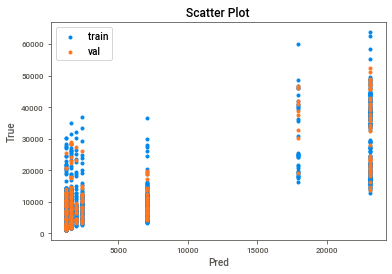

In [22]:
#散布図
plt.scatter(y_train_pred,y_train,label="train")
plt.scatter(y_val_pred,y_val,label="val")
plt.xlabel("Pred")
plt.ylabel("True")
plt.title("Scatter Plot")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


scikit-learnのGradientBoostingRegressorの訓練データスコア
 MAE=7767.58283053439
 MSE=121760093.34346493
 RMSE=11034.495608928617
 R2=0.1507054280817811
scikit-learnのGradientBoostingRegressorの検証データスコア
 MAE=7992.856273725118
 MSE=130084340.6158355
 RMSE=11405.452231973772
 R2=0.18252767286837712


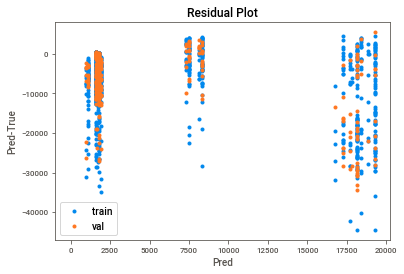

In [23]:
#use GradientBoosting　　重みなし
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=43, # 何個の木を作成するか（=イテレーション数）
                                      learning_rate=0.1,  # 学習率（今回はデフォルト値）
                                      random_state=0, # シード値
                                       max_depth=8
                                      ).fit(X_train,y_train)
y_train_pred=gb_reg.predict(X_train_scaled)
y_val_pred=gb_reg.predict(X_val_scaled)
    
print("scikit-learnのGradientBoostingRegressorの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのGradientBoostingRegressorの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),forest_reg.coef_)):
#     print(f"w{i}({col})={coef}")
    
# print(f"b={forest_reg.intercept_}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)


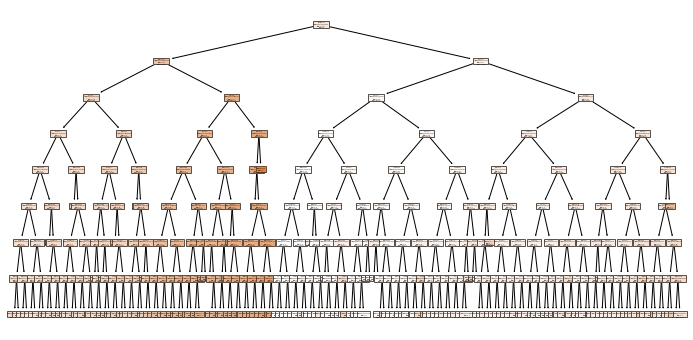

In [24]:
from sklearn import tree
plt.figure(figsize=(12, 6))
num_trees = 0 # 何番目のモデルを表示するか
tree.plot_tree(gb_reg.estimators_[num_trees][0], # 弱学習器のインスタンス 
               feature_names=X_train_nan2minus1.columns, # 列名
               filled=True) # 色を塗るかどうか
print() 

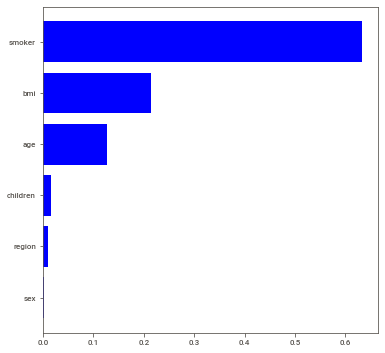

In [25]:
#説明変数ごとの重要度
features=X_train.columns
importances=tree_reg.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)),importances[indices],color="b",align="center")
plt.yticks(range(len(indices)),features[indices])
plt.show()

In [26]:
X_val_pred=X_val.copy()
X_val_pred["pred"]=np.round(tree_reg.predict(X_val),2)
X_val_pred.describe()[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
X_val_pred.sort_values(["smoker","bmi","age"])


,age,sex,bmi,children,smoker,region,pred
989,24,1,20.520,0,0,3,14581.89
362,19,1,21.700,0,0,0,23146.51
58,53,1,22.880,1,0,1,21797.54
85,45,0,22.895,2,0,2,28373.33
156,48,0,24.420,0,0,1,21797.54
...,...,...,...,...,...,...,...
227,58,1,41.910,0,1,1,12107.95
1239,25,1,42.130,1,1,1,3148.91
656,26,1,42.400,1,1,0,3148.91
442,18,0,43.010,0,1,1,1155.13


## XGBoost

In [27]:
#https://dataanablog.com/xgboost-regression-that-can-be-done-by-copy-and-paste/
#https://www.procrasist.com/entry/10-cross-validation
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
xgb_reg=XGBRegressor(random_state=0)
k_fold=KFold(n_splits=5,shuffle=True,random_state=0)
# 予測

print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("検証データスコア")
get_eval_score(y_val,y_val_pred)

訓練データスコア
 MAE=7767.58283053439
 MSE=121760093.34346493
 RMSE=11034.495608928617
 R2=0.1507054280817811
検証データスコア
 MAE=7992.856273725118
 MSE=130084340.6158355
 RMSE=11405.452231973772
 R2=0.18252767286837712


In [28]:
xgb_reg_grid=XGBRegressor()

from sklearn.model_selection import GridSearchCV

params={"booster":["gbtree"],
       "n_estimators":[10,30,50,100],
       "max_depth":[2,3,4,5,6],
       "learning_rate":[0.1,0.25,0.5,0.75,1.0],
       "colsample_bytree":[0.1,0.25,0.5,0.75,1.0],
       "random_state":[0]
       }

k_fold=KFold(n_splits=5,shuffle=True,random_state=0)
grid=GridSearchCV(estimator=xgb_reg_grid,
                          param_grid=params,
                          cv=k_fold,
                          scoring="r2")

[04:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

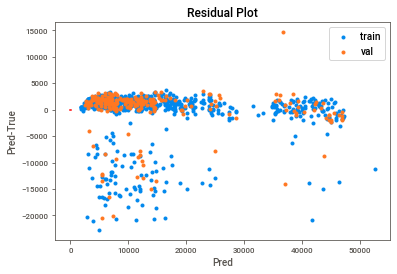

In [29]:
grid.fit(X_train, y_train) # 学習には約 1 分

print(grid.best_params_)#最も評価が高かった組み合わせ
print(grid.best_score_)#その組み合わせのスコア

# 予測

y_train_pred=grid.predict(X_train)
y_val_pred = grid.predict(X_val)
y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)


print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("検証データスコア")
get_eval_score(y_val,y_val_pred)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

In [32]:
xgb_reg_random=XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV
random=RandomizedSearchCV(estimator=xgb_reg_random,param_distributions=params,scoring="r2",cv=k_fold,n_iter=30,random_state=0)

In [33]:
random.fit(X_train,y_train)
print(random.best_params_)
print(random.best_score_)

# 予測
y_train_pred = random.predict(X_train)
y_val_pred = random.predict(X_val)
y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("検証データスコア")
get_eval_score(y_val,y_val_pred)

[04:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
# X_out=pd.concat([df[116:117], df[286:287], df[401:402], df[543:544], df[847:848], df[860:861], df[1047:1048], df[1088:1089], df[1317:1318]])
# X_out=X_out.drop('charges',axis=1)
# random.fit(X_train,y_train)
# print(random.best_params_)
# print(random.best_score_)

# # 予測#X_out
# y_train_pred = random.predict(X_train)
# y_val_pred = random.predict(X_out)
# y_val_pred

{'random_state': 0, 'n_estimators': 30, 'max_depth': 2, 'learning_rate': 0.5, 'colsample_bytree': 0.5, 'booster': 'gbtree'}
0.8427641087649121


array([14122.734, 12399.117,  9473.675, 53383.617,  4679.092, 41696.37 ,
       36924.37 , 12000.024,  5435.573], dtype=float32)

In [ ]:
ls

MedicalCost_EDA&Preprocessing.ipynb  insurance.zip
MedicalCost_MachineLearning.ipynb    insurance2.csv
Untitled1.ipynb                      sample_submission.csv
insurance.csv


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler([-1,1])
# 引数にdataという変数を入れた場合です
X_MinMaxScaler = scaler.fit_transform(y_val_pred)

In [36]:
# 予測
# y_train_pred = grid.predict(X_train)
# y_val_pred = grid.predict(X_val)
y_val_pred_df = pd.DataFrame({'XGB': grid.predict(X_val)})

df_val = X_val.copy()
df_val['y_true'] = y_val
df_val['y_pred'] = y_val_pred

 
# 投稿用csvの生成
 
submissionfile = pd.read_csv('/content/drive/MyDrive/0310/0310/sample_submission.csv', index_col=0)
submissionfile=df_val
# submissionfile['charges'] = y_val_pred_df
submissionfile['X_MinMaxScaler'] = X_MinMaxScaler
# submissionfile.to_csv('./submissionfile.csv')


In [38]:
y_val_pred_df

,XGB
0,12143.482422
1,10101.948242
2,44769.914062
3,14394.403320
4,10484.949219
...,...
263,17293.978516
264,7518.211426
265,12076.184570
266,40406.175781


In [37]:
submissionfile

,age,sex,bmi,children,smoker,region,y_true,y_pred,X_MinMaxScaler
578,52,0,30.200,1,1,0,9724.53000,12571.141602,-0.514398
610,47,1,29.370,1,1,1,8547.69130,9351.801758,-0.650820
569,48,0,40.565,2,0,2,45702.02235,47307.863281,0.957596
1034,61,0,38.380,0,1,2,12950.07120,13066.439453,-0.493410
198,51,1,18.050,0,1,2,9644.25250,8312.457031,-0.694863
...,...,...,...,...,...,...,...,...,...
1084,62,1,30.495,2,1,2,15019.76005,18624.335938,-0.257890
726,41,0,28.405,1,1,2,6664.68595,6470.789062,-0.772905
1132,57,0,40.280,0,1,3,20709.02034,11556.212891,-0.557407
725,30,1,39.050,3,0,1,40932.42950,41873.828125,0.727325


In [ ]:
def high_score(x):
    if x>=0.8 or -0.8>=x:
        return 1
    else:
        return 0

In [ ]:
submissionfile['X_MinMaxScaler']

578    -0.546035
610    -0.630984
569     0.817874
1034   -0.434540
198    -0.646923
          ...   
1084   -0.347276
726    -0.760823
1132   -0.573655
725     0.632934
963    -0.597404
Name: X_MinMaxScaler, Length: 268, dtype: float32

In [ ]:
submissionfile['dangerous']=submissionfile['X_MinMaxScaler'].apply(high_score)
submissionfile.head()

,age,sex,bmi,children,smoker,region,y_true,y_pred,X_MinMaxScaler,dangerous
578,52,0,30.200,1,1,0,9724.53000,12259.724609,-0.546035,0
610,47,1,29.370,1,1,1,8547.69130,10256.586914,-0.630984,0
569,48,0,40.565,2,0,2,45702.02235,44421.308594,0.817874,1
1034,61,0,38.380,0,1,2,12950.07120,14888.829102,-0.434540,0
198,51,1,18.050,0,1,2,9644.25250,9880.730469,-0.646923,0


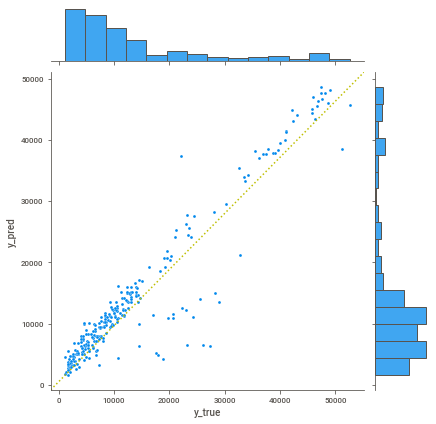

In [ ]:
import seaborn as sns
g = sns.jointplot(data=df_val, x='y_true', y='y_pred')

g.ax_joint.plot([0,1], [0,1], ':y', transform=g.ax_joint.transAxes)

# This is the x=y line using transforms
plt.show()

In [ ]:
!pip3 install shap

     |████████████████████████████████| 433 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 930 kB/s eta 0:00:011
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached cloudpickle-2.0.0-py3-none-any.whl (25 kB)
     |████████████████████████████████| 18.5 MB 1.0 MB/s eta 0:00:01


In [ ]:
import shap
explainer=shap.TreeExplainer(tree_reg)
explainer

In [ ]:
shap_values=explainer.shap_values(X_val)
shap_values

array([[ 2284.17822246,   -56.56927972,   500.18159382,  -195.04623618,
        -5683.07462209,  -494.0696343 ],
       [ 1444.83125784,    78.13260242, -1182.33380169,    45.69561876,
        -4186.30700927, -1331.91869075],
       [ 1208.61107277,   -89.70911754,  6368.26470104,   378.37777542,
        23331.59839447,   168.96661781],
       ...,
       [ 3967.19217263,  -228.08354576,  1088.61784185, -1235.54491326,
        -6062.15018817,   441.6788267 ],
       [  922.45784086,    57.6548509 , 10960.69688101,   543.98655621,
        25903.75216994,  -427.52458995],
       [  580.56394829,   -60.8350377 ,  -865.69428475,   871.28385884,
        -3986.39586702,   140.62877632]])

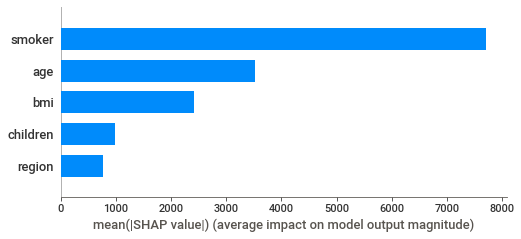

In [ ]:
shap.summary_plot(
    shap_values=shap_values,
    features=X_val,
    plot_type="bar",
    max_display=5)

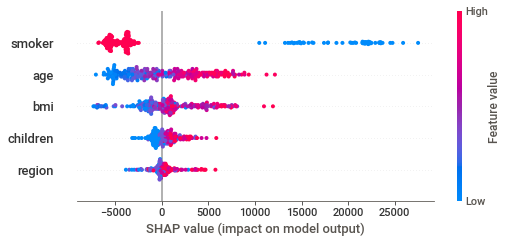

In [ ]:
shap.summary_plot(
    shap_values=shap_values,
    features=X_val,
    plot_type="dot",
    max_display=5)

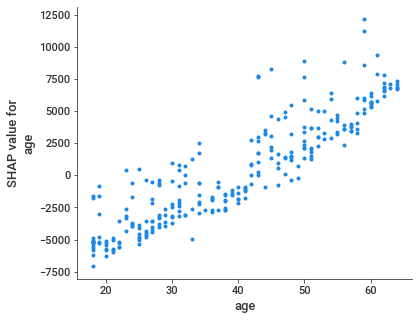

In [ ]:
shap.dependence_plot(
    ind="age",
    interaction_index=None,
    shap_values=shap_values,
    features=X_val,
)

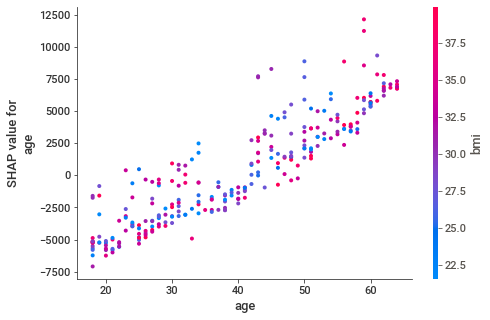

In [ ]:
shap.dependence_plot(
    ind="age",
    interaction_index="bmi",
    shap_values=shap_values,
    features=X_val,
)

In [ ]:
shap.initjs()
row_index=X_val.index.get_loc(1034)
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[row_index,:],
    features=X_val.iloc[row_index,:])

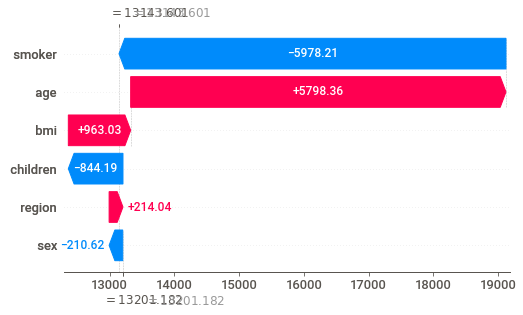

In [ ]:
row_index=X_val.index.get_loc(1034)
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value[0],
    shap_values=shap_values[row_index,:],
    features=X_train.iloc[row_index,:])

In [ ]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_val.shape,y_val.shape

((1070, 6), (1070, 1), (268, 6), (268, 1), (268, 6), (268, 1))

## LightGBM

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=100, # 何個の木を作成するか（=イテレーション数）
                        learning_rate=0.1,  # 学習率（今回はデフォルト値）
                        gamma=0, # 末端ノードの個数に対する正則化係数（今回はデフォルト値）
                        reg_lambda=1, # 末端ノードの出力値に対する正則化係数（今回はデフォルト値）
                        random_state=0, # シード値
                        )

In [ ]:
%%time
lgbm.fit(X_train_scaled,y_train) 

In [ ]:
from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor(n_estimators=500)

lgbm_reg.fit(X_train, y_train)

y_train_pred=lgbm_reg.predict(X_train_scaled)
y_val_pred = lgbm_reg.predict(X_val_scaled)

print("scikit-learnのLGBMRegressorの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのLGBMRegressorの検証データスコア")
get_eval_score(y_train,y_train_pred)

# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),lgbm_reg.coef_[0])):
#     print(f"w{i}({col})={coef}")
    
# print(f"b={lgbm_reg.intercept_[0]}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

In [ ]:
import lightgbm
lightgbm.plot_tree(lgbm, # LightGBMのインスタンス
                  tree_index=0, # 何番目のモデルを表示するか
                  figsize=(18, 20))
print()

In [ ]:
from sklearn.metrics import mean_squared_error
def models():
    #use logistic regression
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    print("LinearRegression")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)

    #use Kneighbors
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor()
    knn.fit(X_train,y_train)
    print("KNeighborsRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)

    #use Support vector classifier (linear kernel)
    from sklearn.svm import SVR
    svr = SVR(kernel='linear')
    svr.fit(X_train,y_train)
    print("SVR")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)

    #use decision tree
    from sklearn.tree import DecisionTreeRegressor
    tree=DecisionTreeRegressor()
    tree.fit(X_train,y_train)
    print("DecisionTreeRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)

    #use Random Forest
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor()
    forest.fit(X_train,y_train)
    print("RandomForestRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)
    
    #use GradientBoosting
    from sklearn.ensemble import GradientBoostingRegressor
    gb = GradientBoostingRegressor()
    gb.fit(X_train,y_train)
    print("GradientBoostingRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)
    
    
    from xgboost import XGBRegressor
    xgb = XGBRegressor()
    xgb.fit(X_train,y_train)
    print("XGBRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)

    from lightgbm import LGBMRegressor
    lgbm = LGBMRegressor()
    lgbm.fit(X_train,y_train)
    print("LGBMRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)
    #Print the accuracy for ech model

    return lr,knn,svr,tree,forest,gb,xgb,lgbm

In [ ]:
models()